<a href="https://colab.research.google.com/github/jmg1977/proyectos/blob/master/Tarea2_Constrain_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Universidad Adolfo Ibañez](https://www.uai.cl/assets/themes/uai-central/img/logo.svg)

---

# UAI : Magister / Diploma AI 2020

---

## Mini-proyecto 2 - Programación Basada en Restricciones

### Descripción Problema a resolver

La evaluación consiste en realizar un modelo
que resuelva el problema de asignar trabajadores
a vuelos en una compañía aérea. Para lo que tenemos los siguientes datos:

1. Hay 20 trabajadores
+ Azafatos: Tom, David, Jeremy, Ron, Joe, Bill, Fred, Bob,
Mario, Ed
+ Azafatas: Carol, Janet, Tracy, Marilyn, Carolyn, Cathy,
Inez, Jean, Heather, Juliet
2. Hay 10 vuelos (la numeración es importante)
3. Cada vuelo necesita el siguiente número de
trabajadores, azafatos y azafatas.

![](https://drive.google.com/uc?export=view&id=1cHJBX0X42Auo0EwdRfY_xUByM_V71m9K)

4. Además, cada vuelo necesita al menos una persona
que sepa francés, una persona que sepa español y
una persona que sepa alemán.
* Saben francés: Inez, Bill, Jean, Juliet
* Saben español: Tom, Jeremy, Mario, Cathy, Juliet
* Saben alemán: Bill, Fred, Joe, Mario, Marilyn, Inez, Heather

5. Si un trabajador trabaja un vuelo, no puede
trabajar ninguno de los siguientes dos vuelos
(ejemplo, si Mario trabaja en el vuelo 1, no
puede trabajar en el vuelo 2 ni en el vuelo 3).

---

### Descripción **Objetivo**

* El objetivo es encontrar una asignación de
trabajadores a vuelos.

* Pregunta extra: ¿Se podría hacer con menos
trabajadores?

# Solución

XXXXXX Descripción de como se piensa resolver el problema XXXXXxxxx

## Importación de paquetes y creación de variables

In [2]:
pip install ortools

     |████████████████████████████████| 29.5MB 137kB/s 
     |████████████████████████████████| 1.3MB 41.1MB/s 
  Found existing installation: protobuf 3.10.0
    Uninstalling protobuf-3.10.0:
      Successfully uninstalled protobuf-3.10.0


In [3]:
from ortools.constraint_solver import pywrapcp

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
#help(pywrapcp)

In [6]:
solver = pywrapcp.Solver("Tripulacion")

In [7]:
 nombres = [
      "Tom", "David", "Jeremy", "Ron", "Joe", "Bill", "Fred", "Bob", "Mario",
      "Ed", "Carol", "Janet", "Tracy", "Marilyn", "Carolyn", "Cathy", "Inez",
      "Jean", "Heather", "Juliet"
  ]

In [8]:
print(nombres)

['Tom', 'David', 'Jeremy', 'Ron', 'Joe', 'Bill', 'Fred', 'Bob', 'Mario', 'Ed', 'Carol', 'Janet', 'Tracy', 'Marilyn', 'Carolyn', 'Cathy', 'Inez', 'Jean', 'Heather', 'Juliet']


In [9]:
personas = len(nombres)
print(personas)

20


Se establece la matriz de atributos que corresponden a toda la tripulación, de modo de poder clasificar y clusterizar los ambitos que tenemos de trabajo de la tripulación.

In [10]:
atributos = [
      #  Azafatos, Azafatas, Frances, Español, Aleman
      [1, 0, 0, 1, 0],  # Tom     = 1
      [1, 0, 0, 0, 0],  # David   = 2
      [1, 0, 0, 1, 0],  # Jeremy  = 3
      [1, 0, 0, 0, 0],  # Ron     = 4
      [1, 0, 0, 0, 1],  # Joe     = 5
      [1, 0, 1, 0, 1],  # Bill    = 6
      [1, 0, 0, 0, 1],  # Fred    = 7
      [1, 0, 0, 0, 0],  # Bob     = 8
      [1, 0, 0, 1, 1],  # Mario   = 9
      [1, 0, 0, 0, 0],  # Ed      = 10
      [0, 1, 0, 0, 0],  # Carol   = 11
      [0, 1, 0, 0, 0],  # Janet   = 12
      [0, 1, 0, 0, 0],  # Tracy   = 13
      [0, 1, 0, 1, 1],  # Marilyn = 14
      [0, 1, 0, 0, 0],  # Carolyn = 15
      [0, 1, 0, 1, 0],  # Cathy   = 16
      [0, 1, 1, 0, 1],  # Inez    = 17
      [0, 1, 1, 0, 0],  # Jean    = 18
      [0, 1, 0, 0, 1],  # Heather = 19
      [0, 1, 1, 1, 0]  # Juliet  = 20
  ]

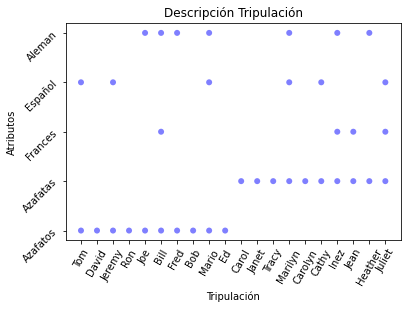

In [11]:
i=0
l=1

for nombre in nombres:
    l=1
    for atributo in atributos[i]:
        if(atributo==1):
            plt.scatter(nombre,l,c='blue',alpha=0.5,edgecolors='none')
        l=l+1
    i=i+1
plt.xticks(rotation=60)
plt.title('Descripción Tripulación')
plt.yticks([1, 2, 3, 4, 5], [ 'Azafatos', 'Azafatas', 'Frances', 'Español', 'Aleman'],rotation=45)
plt.xlabel("Tripulación")

plt.ylabel("Atributos")
plt.show()

Se forma la siguiente tabla requerida por las condiciones del problema generado correspondiente a la tripulación requerida por fila (cada fila es un vuelo de la tabla del encabezado):

  + Numero Trabajadores     : Numero total de trabajadores requeridos en vuelo
  + Azafatos  : Azafatos requeridos
  + Azafatas : Azafatas requeridas
  + Frances    : Cuantos requeridos que sepan frances
  + Español   : Cuantos que sepan español son requeridos
  + Aleman    : Cuantos que sepan Aleman son requeridos

In [12]:

tripulacion_requerida = [
                         [4, 1, 1, 1, 1, 1],  # Vuelo 1
                         [5, 1, 1, 1, 1, 1],  # Vuelo 2
                         [5, 1, 1, 1, 1, 1],  # Vuelo 3
                         [6, 2, 2, 1, 1, 1],  # Vuelo 4
                         [7, 3, 3, 1, 1, 1],  # Vuelo 5
                         [4, 1, 1, 1, 1, 1],  # Vuelo 6
                         [5, 1, 1, 1, 1, 1],  # Vuelo 7
                         [6, 1, 1, 1, 1, 1],  # Vuelo 8
                         [6, 2, 2, 1, 1, 1],  # Vuelo 9
                         [7, 3, 3, 1, 1, 1]   # Vuelo 10
                         ]

mumero_vuelos = len(tripulacion_requerida)  # numero de vuelos

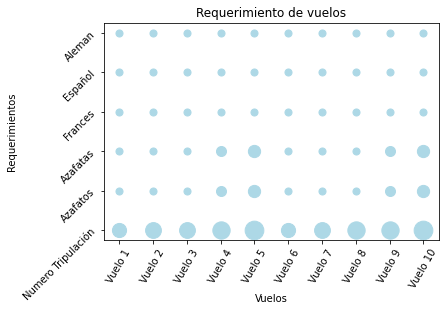

In [13]:
i=0
lista_vuelos = []                    
for vuelo in range(mumero_vuelos):
    l=1
    lista_vuelos.append("Vuelo "+str(vuelo+1))
    for trip in tripulacion_requerida[i]:
        plt.scatter(lista_vuelos[vuelo],l,c='lightblue',s=trip*50)
        l=l+1
    i=i+1
plt.xticks(rotation=60)
plt.title('Requerimiento de vuelos')
plt.yticks([1, 2, 3, 4, 5,6], [ 'Numero Tripulación','Azafatos', 'Azafatas', 'Frances', 'Español', 'Aleman'],rotation=45)
plt.xlabel("Vuelos")
plt.ylabel("Requerimientos")
plt.show()

Se genera un diccionario de tripulación con llave una tupla que tiene el valor del vuelo en el primer elemento y de la cantidad de tripulacióón en el segundo y el elemnto valor corresponde a un solver que puede ser 0 o 1.

Tambien se crea una variable numero de trabajadores que contieen un solver que corresponde a una variable entera que puede ir desde 1 a numero de personas, llamada num_trab

In [14]:
tripulacion = {}
for i in range(mumero_vuelos):
  for j in range(personas):
    tripulacion[(i, j)] = solver.IntVar(0, 1, "tripulacion[%i,%i]" % (i, j)) 

tripulacion_f = [ tripulacion[(i, j)] for i in range(mumero_vuelos) for j in range(personas)]

  # numero de personas trabajando
num_trab = solver.IntVar(1, personas, "num_trab")

In [15]:
type(tripulacion)

dict

In [16]:
tripulacion.keys()

dict_keys([(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 1

In [17]:
num_trab

num_trab(1..20)

In [23]:
print(tripulacion_f)

[tripulacion[0,0](0 .. 1), tripulacion[0,1](0 .. 1), tripulacion[0,2](0 .. 1), tripulacion[0,3](0 .. 1), tripulacion[0,4](0 .. 1), tripulacion[0,5](0 .. 1), tripulacion[0,6](0 .. 1), tripulacion[0,7](0 .. 1), tripulacion[0,8](0 .. 1), tripulacion[0,9](0 .. 1), tripulacion[0,10](0 .. 1), tripulacion[0,11](0 .. 1), tripulacion[0,12](0 .. 1), tripulacion[0,13](0 .. 1), tripulacion[0,14](0 .. 1), tripulacion[0,15](0 .. 1), tripulacion[0,16](0 .. 1), tripulacion[0,17](0 .. 1), tripulacion[0,18](0 .. 1), tripulacion[0,19](0 .. 1), tripulacion[1,0](0 .. 1), tripulacion[1,1](0 .. 1), tripulacion[1,2](0 .. 1), tripulacion[1,3](0 .. 1), tripulacion[1,4](0 .. 1), tripulacion[1,5](0 .. 1), tripulacion[1,6](0 .. 1), tripulacion[1,7](0 .. 1), tripulacion[1,8](0 .. 1), tripulacion[1,9](0 .. 1), tripulacion[1,10](0 .. 1), tripulacion[1,11](0 .. 1), tripulacion[1,12](0 .. 1), tripulacion[1,13](0 .. 1), tripulacion[1,14](0 .. 1), tripulacion[1,15](0 .. 1), tripulacion[1,16](0 .. 1), tripulacion[1,17](0 

In [22]:
print(tripulacion)

{(0, 0): tripulacion[0,0](0 .. 1), (0, 1): tripulacion[0,1](0 .. 1), (0, 2): tripulacion[0,2](0 .. 1), (0, 3): tripulacion[0,3](0 .. 1), (0, 4): tripulacion[0,4](0 .. 1), (0, 5): tripulacion[0,5](0 .. 1), (0, 6): tripulacion[0,6](0 .. 1), (0, 7): tripulacion[0,7](0 .. 1), (0, 8): tripulacion[0,8](0 .. 1), (0, 9): tripulacion[0,9](0 .. 1), (0, 10): tripulacion[0,10](0 .. 1), (0, 11): tripulacion[0,11](0 .. 1), (0, 12): tripulacion[0,12](0 .. 1), (0, 13): tripulacion[0,13](0 .. 1), (0, 14): tripulacion[0,14](0 .. 1), (0, 15): tripulacion[0,15](0 .. 1), (0, 16): tripulacion[0,16](0 .. 1), (0, 17): tripulacion[0,17](0 .. 1), (0, 18): tripulacion[0,18](0 .. 1), (0, 19): tripulacion[0,19](0 .. 1), (1, 0): tripulacion[1,0](0 .. 1), (1, 1): tripulacion[1,1](0 .. 1), (1, 2): tripulacion[1,2](0 .. 1), (1, 3): tripulacion[1,3](0 .. 1), (1, 4): tripulacion[1,4](0 .. 1), (1, 5): tripulacion[1,5](0 .. 1), (1, 6): tripulacion[1,6](0 .. 1), (1, 7): tripulacion[1,7](0 .. 1), (1, 8): tripulacion[1,8](0 

## Creación de restricciones

# Conclusiones

# Integrantes